In [1]:
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.transform import resize

import random


In [2]:
# Paths to be created
path_luminance_test = "luminance"
path_edge_test = "damiers"

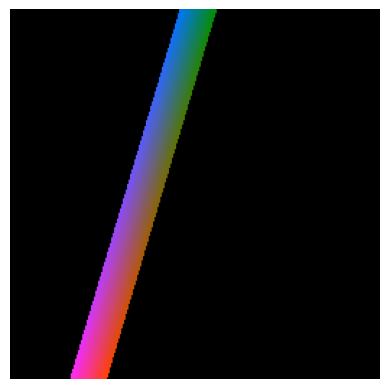

940.4405087491465


(0.2126, 0.7152, 0.0722)

In [3]:

def create_image(constant, alpha):
    size = 500
    # Create an empty image of size 1024x1024 with 3 channels (R, G, B)
    image = np.zeros((size, size, 3), dtype=np.uint8)

    # Iterate over each pixel
    for i in range(size):
        for j in range(size):
            # Set red value
            green = -42
            while green>255 or green<0:
                red = np.random.randint(0, 256)
                # Calculate green value based on the constant and alpha
                green = (constant - red) / alpha
            # Set the pixel value
            image[i, j] = [red, green, 0]  # Blue channel is kept 0

    return image


def create_image_2(constant, alpha, beta):
    size = 256
    image = np.zeros((size, size, 3), dtype=np.uint8)

    for i in range(size):
        for j in range(size):
            red = i
            green = j
            # Calculate blue based on the constant, alpha, and beta
            blue = (constant - red - alpha * green) / beta
            # Check if blue is within valid range

            if 0 <= blue <= 255:
                image[i, j] = [int(red), int(green), int(blue)]
            else:
                image[i, j] = [int(0), int(0), int(0)]


    return image




titre = "Lum_Constant_100_Alpha"

if False:
    alpha = 2.5 #red + alpha*green + beta*

    beta = 0.6
else:
    c1,c2,c3 = 0.2126, 0.7152, 0.0722

    alpha = c2/c1
    beta = c3/c1

# Réglage de la valeur (V) à 0.5 pour obtenir un niveau de gris constant
#image_rgb = create_image(100,alpha)
#image_rgb = create_image(300,alpha)
image_rgb = create_image_2(102*(1+alpha+beta),alpha,beta)

# Affichage de l'image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

sum_coef = 1 + alpha + beta
c1,c2,c3 = 1/sum_coef, alpha/sum_coef, beta/sum_coef

Luminance = c1*image_rgb[:,:,0] + c2*image_rgb[:,:,1] + c3*image_rgb[:,:,2]

print(np.var(Luminance))

if True:
    from PIL import Image

    # Conversion de l'image en format adapté pour la sauvegarde
    image_to_save = (image_rgb).astype(np.uint8)
    img_tiff = Image.fromarray(image_to_save)

    # Sauvegarde de l'image au format TIFF
    img_tiff.save(path_luminance_test+"\\"+titre+'.tif')

c1,c2,c3


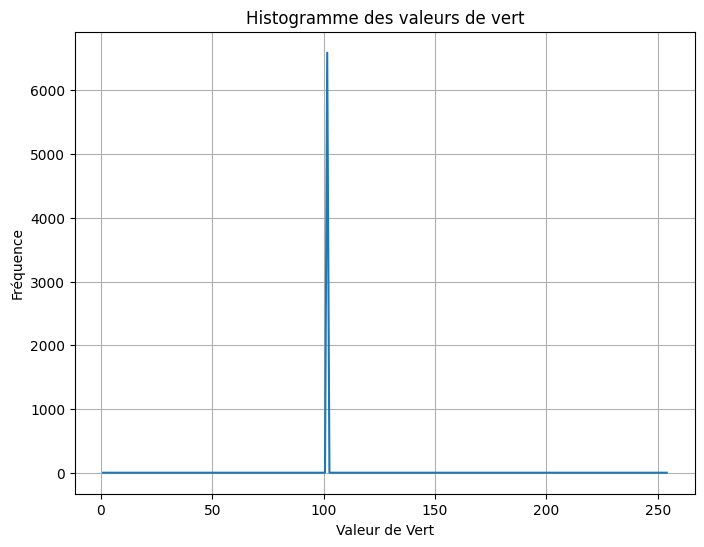

In [4]:
# Calcul de l'histogramme des valeurs de luminance
#histogram, bin_edges = np.histogram(np.mean(image_rgb,axis=2)*255, bins=256, range=(0, 255))
#histogram, bin_edges = np.histogram(image_rgb[:,:,2]*255, bins=256, range=(0, 255))
histogram, bin_edges = np.histogram(Luminance, bins=256, range=(0, 255))
# Tracé de l'histogramme
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[1:-1], histogram[1:])
plt.title('Histogramme des valeurs de vert')
plt.xlabel('Valeur de Vert')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

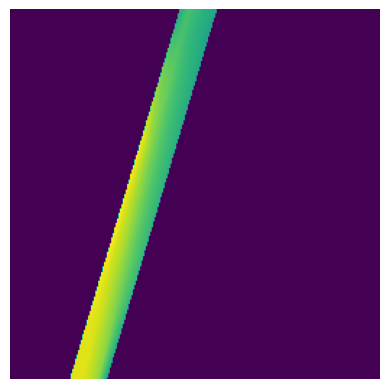

(14.555086068725585, array(1937.60008312))

In [5]:
from PIL import Image
import numpy as np

image_path = "luminance/"+titre+"_out"+".tif"

img_test = Image.open(image_path)
image_test_array = np.array(img_test)


data = c1*image_test_array[:,:,0] + c2*image_test_array[:,:,1] + c3*image_test_array[:,:,2]

# Affichage de l'image
plt.imshow(data)
plt.axis('off')
plt.show()

# Calcul de la moyenne et de la covariance de la luminance
mean_data = np.mean(data)
covariance_data = np.cov(data.reshape(-1))

mean_data, covariance_data

# Calcul de la luminance en utilisant la formule standard pour la conversion RGB en luminance
# Luminance = 0.299*R + 0.587*G + 0.114*B
#luminance = image_test_array[:,:,2]
luminance = np.mean(image_test_array, axis = 2)
luminance = 0.2126*image_test_array[:,:,0] + 0.7152*image_test_array[:,:,1] + 0.0722*image_test_array[:,:,2]
#luminance = image_test_array[mask]

# Calcul de la moyenne et de la covariance de la luminance
mean_luminance = np.mean(luminance)
covariance_luminance = np.cov(luminance.reshape(-1))

mean_luminance, covariance_luminance

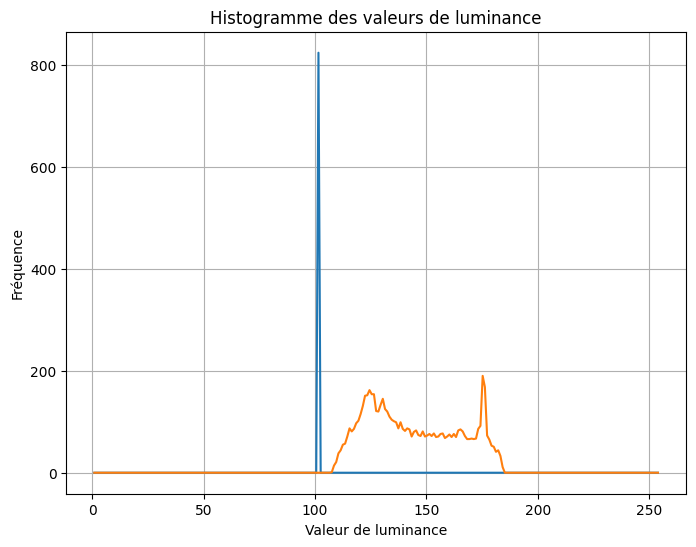

In [6]:
# Calcul de l'histogramme des valeurs de luminance
histogram_new, bin_edges_new = np.histogram(luminance, bins=256, range=(0, 255))

# Tracé de l'histogramme
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[1:-1], histogram[1:]/8)
plt.plot(bin_edges_new[1:-1], histogram_new[1:])
plt.title('Histogramme des valeurs de luminance')
plt.xlabel('Valeur de luminance')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()